<br>

####  Predicting profititability of a transaction

+ A project related to this kaggle dataset: https://www.kaggle.com/datasets/itssuru/super-store


In [1]:
# libraries!
import numpy as np
import pandas as pd

In [2]:

filename = 'superstore_clean.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

superstore_clean.csv : file read into a pandas dataframe.


In [3]:

print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information


df_tidy.shape is (9994, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   int64  
 1   Segment       9994 non-null   int64  
 2   State         9994 non-null   int64  
 3   Postal Code   9994 non-null   int64  
 4   Region        9994 non-null   int64  
 5   Category      9994 non-null   int64  
 6   Sub-Category  9994 non-null   int64  
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
 11  Profitable    9994 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 1015.0 KB


In [4]:
PROFITS = ['No Profit', 'Profit']   # int to str
PROFITS_INDICES= {'No Profit':0,'Profit':1}  # str to int

# Let's try it out...
for name in PROFITS:
    print(f"{name} maps to {PROFITS_INDICES[name]}")

No Profit maps to 0
Profit maps to 1


In [5]:
df_model1 = df_tidy.drop('Profit', axis=1)
df_model1

,Ship Mode,Segment,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profitable
0,3,1,24,42420,0,2,5,261.9600,2,0.00,1
1,3,1,24,42420,0,2,0,731.9400,3,0.00,1
2,3,0,5,90036,3,1,1,14.6200,2,0.00,1
3,1,1,2,33311,0,2,15,957.5775,5,0.45,0
4,1,1,2,33311,0,1,14,22.3680,2,0.20,1
...,...,...,...,...,...,...,...,...,...,...,...
9989,3,1,2,33180,0,2,8,25.2480,3,0.20,1
9990,1,1,5,92627,3,2,8,91.9600,2,0.00,1
9991,1,1,5,92627,3,0,16,258.5760,2,0.20,1
9992,1,1,5,92627,3,1,10,29.6000,4,0.00,1


In [6]:
#
# convert our dataframe to a numpy array, named A
#
A = df_model1.to_numpy()   
print(A)

[[ 3.   1.  24.  ...  2.   0.   1. ]
 [ 3.   1.  24.  ...  3.   0.   1. ]
 [ 3.   0.   5.  ...  2.   0.   1. ]
 ...
 [ 1.   1.   5.  ...  2.   0.2  1. ]
 [ 1.   1.   5.  ...  4.   0.   1. ]
 [ 3.   1.   5.  ...  2.   0.   1. ]]


In [7]:
#
# let's make sure it's all floating-point
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 3.   1.  24.  ...  2.   0.   1. ]
 [ 3.   1.  24.  ...  3.   0.   1. ]
 [ 3.   0.   5.  ...  2.   0.   1. ]
 ...
 [ 1.   1.   5.  ...  2.   0.2  1. ]
 [ 1.   1.   5.  ...  4.   0.   1. ]
 [ 3.   1.   5.  ...  2.   0.   1. ]]


In [8]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 9994 rows and 11 cols


In [9]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:10]  # X (features) ... is all rows, columns 0 to 10th
y_all = A[:,10]    # y (labels) ... is all rows, column 11 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [1. 1. 1. ... 1. 1. 1.]
X_all (just the features, first few rows) are 
 [[3.000000e+00 1.000000e+00 2.400000e+01 4.242000e+04 0.000000e+00
  2.000000e+00 5.000000e+00 2.619600e+02 2.000000e+00 0.000000e+00]
 [3.000000e+00 1.000000e+00 2.400000e+01 4.242000e+04 0.000000e+00
  2.000000e+00 0.000000e+00 7.319400e+02 3.000000e+00 0.000000e+00]
 [3.000000e+00 0.000000e+00 5.000000e+00 9.003600e+04 3.000000e+00
  1.000000e+00 1.000000e+00 1.462000e+01 2.000000e+00 0.000000e+00]
 [1.000000e+00 1.000000e+00 2.000000e+00 3.331100e+04 0.000000e+00
  2.000000e+00 1.500000e+01 9.575775e+02 5.000000e+00 4.500000e-01]
 [1.000000e+00 1.000000e+00 2.000000e+00 3.331100e+04 0.000000e+00
  1.000000e+00 1.400000e+01 2.236800e+01 2.000000e+00 2.000000e-01]]


In [10]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 1. 1. ... 1. 1. 1.]
The corresponding data rows are 
 [[3.00000e+00 2.00000e+00 5.00000e+00 9.39050e+04 3.00000e+00 2.00000e+00
  5.00000e+00 1.48257e+02 3.00000e+00 1.50000e-01]
 [2.00000e+00 2.00000e+00 3.80000e+01 7.70410e+04 1.00000e+00 1.00000e+00
  1.00000e+01 6.55840e+01 2.00000e+00 2.00000e-01]
 [1.00000e+00 1.00000e+00 5.00000e+00 9.08050e+04 3.00000e+00 1.00000e+00
  1.00000e+00 2.96000e+01 2.00000e+00 0.00000e+00]
 [1.00000e+00 2.00000e+00 3.20000e+01 3.70420e+04 0.00000e+00 2.00000e+00
  5.00000e+00 3.87136e+02 4.00000e+00 2.00000e-01]
 [2.00000e+00 1.00000e+00 3.70000e+01 2.85400e+04 0.00000e+00 1.00000e+00
  7.00000e+00 2.17440e+01 1.00000e+00 2.00000e-01]]


In [11]:

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 7995 rows;  testing with 1999 rows

Held-out data... (testing data: 1999)
y_test: [1. 1. 1. ... 1. 1. 0.]

X_test (few rows): [[2.00000e+00 0.00000e+00 2.00000e+00 3.38010e+04 0.00000e+00 1.00000e+00
  1.40000e+01 5.63808e+02 4.00000e+00 2.00000e-01]
 [3.00000e+00 1.00000e+00 5.00000e+00 9.41100e+04 3.00000e+00 1.00000e+00
  9.00000e+00 3.66720e+01 2.00000e+00 2.00000e-01]
 [1.00000e+00 0.00000e+00 1.80000e+01 6.58070e+04 1.00000e+00 2.00000e+00
  8.00000e+00 3.73000e+01 2.00000e+00 0.00000e+00]
 [1.00000e+00 2.00000e+00 3.80000e+01 7.70410e+04 1.00000e+00 2.00000e+00
  0.00000e+00 2.12058e+02 3.00000e+00 3.00000e-01]
 [1.00000e+00 1.00000e+00 5.00000e+00 9.00360e+04 3.00000e+00 2.00000e+00
  1.50000e+01 1.71288e+02 3.00000e+00 2.00000e-01]]

Data used for modeling... (training data: 7995)
y_train: [0. 1. 1. ... 1. 1. 0.]

X_train (few rows): [[1.0000e+00 1.0000e+00 3.8000e+01 7.7095e+04 1.0000e+00 1.0000e+00
  1.3000e+01 2.2640e+00 1.0000e+00 8.0000e-01]
 [1.0000e+00 1.0

<br>

#### Starting Decision Tree Modeling

In [12]:
   
# Create a DT model and train it! 
#
from sklearn import tree  

best_depth = 1   
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                            
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [13]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        # print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    print("The percentage accuracy is, ", num_correct*100/NUM_LABELS)
    return num_correct

# let's try it out!
# compare_labels(predicted_labels,actual_labels)

<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

In [14]:
#
# To compare different tree-depths, we use cross validation to get the best_d
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,100):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy: 
        best_accuracy = average_cv_accuracy
        best_d = d

# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} is our choice for an underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.9382
depth:  2  cv accuracy:  0.9382
depth:  3  cv accuracy:  0.9393
depth:  4  cv accuracy:  0.9388
depth:  5  cv accuracy:  0.9422
depth:  6  cv accuracy:  0.9432
depth:  7  cv accuracy:  0.9422
depth:  8  cv accuracy:  0.9390
depth:  9  cv accuracy:  0.9357
depth: 10  cv accuracy:  0.9333
depth: 11  cv accuracy:  0.9338
depth: 12  cv accuracy:  0.9327
depth: 13  cv accuracy:  0.9326
depth: 14  cv accuracy:  0.9313
depth: 15  cv accuracy:  0.9316
depth: 16  cv accuracy:  0.9305
depth: 17  cv accuracy:  0.9298
depth: 18  cv accuracy:  0.9303
depth: 19  cv accuracy:  0.9306
depth: 20  cv accuracy:  0.9306
depth: 21  cv accuracy:  0.9301
depth: 22  cv accuracy:  0.9316
depth: 23  cv accuracy:  0.9312
depth: 24  cv accuracy:  0.9315
depth: 25  cv accuracy:  0.9310
depth: 26  cv accuracy:  0.9316
depth: 27  cv accuracy:  0.9320
depth: 28  cv accuracy:  0.9307
depth: 29  cv accuracy:  0.9320
depth: 30  cv accuracy:  0.9303
depth: 31  cv accuracy:  0.9306
depth: 3

In [15]:
# rerun
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 6


In [16]:
#
# Now, let's see the tree!
#

filename = 'super_score_tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=df_model1.columns[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=PROFITS,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
    
#
# Lab task:  build trees at depths 1 and 2+ (submit in this notebook -- see next cell for depth-1 solution)
#

file super_score_tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="Discount <= 0.25\ngini = 0.314\nsamples = 7995\nvalue = [1559, 6436]\nclass = Profit", fillcolor="#69b5eb"] ;
1 [label="Discount <= 0.125\ngini = 0.126\nsamples = 6874\nvalue = [466, 6408]\nclass = Profit", fillcolor="#47a4e7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Sub-Category <= 13.5\ngini = 0.014\nsamples = 3906\nvalue = [27, 3879]\nclass = Profit", fillcolor="#3a9ee5"] ;
1 -> 2 ;
3 [label="Discount <= 0.05\ngini = 0.004\nsamples = 3171\nvalue = [6, 3165]\nclass = Profit", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="Sales <= 5.945\ngini = 0.002\nsamples = 3093\nvalue = [3, 3090]\nclass = Profit", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="Sales <= 5.93\ngini = 0.025\nsamples = 161\nvalue = [2, 15

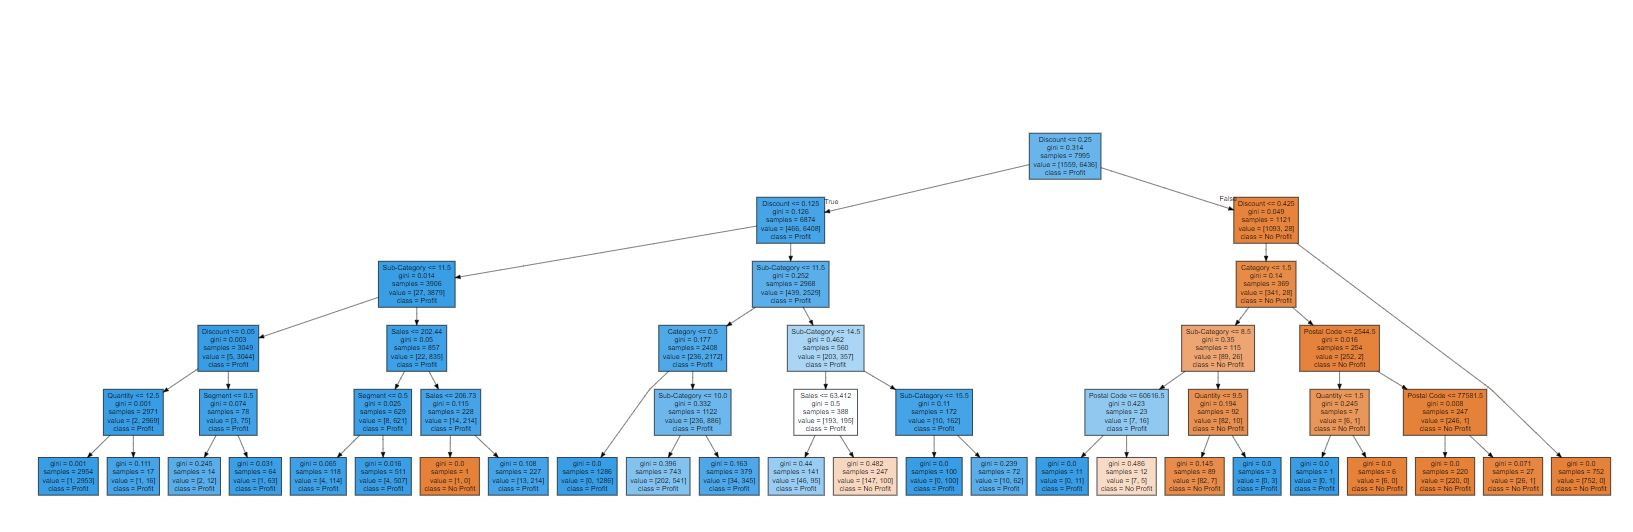

In [17]:
#
# include your screenshot locally, to this notebook...
#

from IPython import display
display.Image("./tree_1.jpg")  # be sure it has the right name, and is in this directory...

# if you've displayed this cell's output, you don't need to submit the image file:
# the notebook keeps an internal version of the image, which is all that's needed.

In [18]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. ... 1. 0. 0.]
Actual labels: [1. 1. 1. ... 1. 1. 0.]


Correct: 1886 out of 1999
The percentage accuracy is,  94.3471735867934


1886

### Building a full model

In [19]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 6


In [20]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    # print(our_features)
    predicted_species = dtree_model_final.predict(our_features)
    # print(predicted_species)
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    # print(predicted_species)

    name = PROFITS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [1,1,4,53711,1,0,12,665.88,6,0.0]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Profit (1) from Features [1, 1, 4, 53711, 1, 0, 12, 665.88, 6, 0.0]


In [21]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {df_model1.columns[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 3.13175322e-04 0.00000000e+00 7.93271637e-04
 0.00000000e+00 2.95489289e-02 6.20363958e-02 3.19580390e-02
 3.33816160e-03 8.72012028e-01]

Feature    Ship Mode has    0.00% of the decision-making importance.
Feature      Segment has    0.03% of the decision-making importance.
Feature        State has    0.00% of the decision-making importance.
Feature  Postal Code has    0.08% of the decision-making importance.
Feature       Region has    0.00% of the decision-making importance.
Feature     Category has    2.95% of the decision-making importance.
Feature Sub-Category has    6.20% of the decision-making importance.
Feature        Sales has    3.20% of the decision-making importance.
Feature     Quantity has    0.33% of the decision-making importance.
Feature     Discount has   87.20% of the decision-making importance.


#### We stop here for our analysis

In [22]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [23]:
#
# Random Forests!!!
#

# Lots of trees, each using a subset of the data usually at a limited depth
#                These many trees then get together to "vote" on the correct classification...

#
# This is an example of an "ensemble" classifier, because a RF is simply an ensemble of many DTs.
# 

In [24]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [25]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. ... 1. 1. 1.]
Actual  labels  : [1. 1. 1. ... 1. 1. 0.]

Results on test set:  1622 correct out of 1999 total.

Correct: 1622 out of 1999
The percentage accuracy is,  81.14057028514257


1622

In [26]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=df_model1.columns[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=PROFITS,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=946161686)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="Region <= 2.5\ngini = 0.313\nsamples = 3138\nvalue = [775, 3223]\nclass = Profit", fillcolor="#69b5eb"] ;
1 [label="gini = 0.359\nsamples = 2160\nvalue = [645, 2103]\nclass = Profit", fillcolor="#76bbed"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.186\nsamples = 978\nvalue = [130, 1120]\nclass = Profit", fillcolor="#50a8e8"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [27]:
# #
# # add locally, to this notebook...
# #

# from IPython import display
# display.Image("./random_forest_ss.png")  # be sure it's in the right place!

In [28]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We previously used a depth of 1  and #trees of 42  
#
# So, we try several depths to find best_d
#            and several #'s of trees to find best_ntrees
#
# The tradeoff is underfitting/overfitting and time...
#     "too many trees" tends may add noticeably to execution time

In [29]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1
best_ntrees = 50   # range(50,300,100)
best_score = 0

for d in range(1,6):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

        if average_cv_accuracy > best_score:
            best_score = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  
print(f"best_score: {best_score}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.8480
depth:  1 ntrees: 150 cv accuracy:  0.8380
depth:  1 ntrees: 250 cv accuracy:  0.8469
depth:  2 ntrees:  50 cv accuracy:  0.9375
depth:  2 ntrees: 150 cv accuracy:  0.9382
depth:  2 ntrees: 250 cv accuracy:  0.9376
depth:  3 ntrees:  50 cv accuracy:  0.9382
depth:  3 ntrees: 150 cv accuracy:  0.9382
depth:  3 ntrees: 250 cv accuracy:  0.9382
depth:  4 ntrees:  50 cv accuracy:  0.9382
depth:  4 ntrees: 150 cv accuracy:  0.9382
depth:  4 ntrees: 250 cv accuracy:  0.9382
depth:  5 ntrees:  50 cv accuracy:  0.9388
depth:  5 ntrees: 150 cv accuracy:  0.9393
depth:  5 ntrees: 250 cv accuracy:  0.9386

best_depth: 5 and best_num_trees: 150 are our choices.
best_score: 0.9393370856785491


In [30]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=150


In [31]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. ... 1. 0. 0.]
Actual  labels  : [1. 1. 1. ... 1. 1. 0.]

Results on test set:  1886 correct out of 1999 total.

Correct: 1886 out of 1999
The percentage accuracy is,  94.3471735867934


1886

In [32]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=150


In [33]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = PROFITS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [1,1,4,53711,1,0,12,665.88,6,0.0]  # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Profit (1) from Features [1, 1, 4, 53711, 1, 0, 12, 665.88, 6, 0.0]


In [34]:
# #
# # try it on new, "unseen" data!
# #

# # Less unseen than in hw4, admittedly!

# LoF = [[4.8, 3.1, 1.6, 0.2 ],
# [5.7, 2.9, 4.2, 1.3 ],
# [5.8, 2.7, 5.1, 1.9 ],
# [5.2, 4.1, 1.5, 0.1 ],
# [5.4, 3.4, 1.5, 0.4 ],
# [5.1, 2.5, 3.0, 1.1 ],
# [6.2, 2.9, 4.3, 1.3 ],
# [6.3, 3.3, 6.0, 2.5 ],
# [5.7, 2.8, 4.1, 1.3 ]]
      
# for Features in LoF:
#     result = predictive_model( Features )
#     print(f"I predict {result} from Features {Features}")

# # these flowers' coded species: 012001122

In [35]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {df_model1.columns[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[9.01891944e-04 6.71625160e-04 9.22814365e-02 4.49615396e-02
 1.01801332e-02 3.84242337e-02 5.22530136e-02 2.66078236e-02
 3.62110717e-03 7.30097196e-01]

Feature    Ship Mode has    0.09% of the decision-making importance.
Feature      Segment has    0.07% of the decision-making importance.
Feature        State has    9.23% of the decision-making importance.
Feature  Postal Code has    4.50% of the decision-making importance.
Feature       Region has    1.02% of the decision-making importance.
Feature     Category has    3.84% of the decision-making importance.
Feature Sub-Category has    5.23% of the decision-making importance.
Feature        Sales has    2.66% of the decision-making importance.
Feature     Quantity has    0.36% of the decision-making importance.
Feature     Discount has   73.01% of the decision-making importance.


In [36]:
#
# That's the random-forest model. Let's consider it found, not lost, for all of its many trees!
#